# Predicting class attendance from the GoalZone Fitness class Dataset

Background
GoalZone is a fitness club chain in Canada.
GoalZone offers a range of fitness classes in two capacities - 25 and 15.
Some classes are always fully booked. Fully booked classes often have a low attendance rate.
GoalZone wants to increase the number of spaces available for classes.
They want to do this by predicting whether the member will attend the class or not.
If they can predict a member will not attend the class, they can make another space
available.

In [4]:
import pandas as pd
df = pd.read_csv('fitness_class_2212.csv')

# Replacing the null weight values with the mean
mean = df['weight'].mean()
df['weight'] = df['weight'].fillna(mean)

# Replacing the 'days' in the 'days_before' column with a white space
df['days_before'] = df['days_before'].str.replace(' days', '')

# Convert the data type of 'days_before' to int
df['days_before'] = df['days_before'].astype(int)

# Cleaning the 'days_of_week' column
df['day_of_week'] = df['day_of_week'].str.replace('Wednesday','Wed')
df['day_of_week'] = df['day_of_week'].str.replace('Monday','Mon')
df['day_of_week'] = df['day_of_week'].str.replace('Fri.','Fri')

# Cleanin the 'category' column by replacing '-' with white space
df['category'] = df['category'].replace('-', 'unknown')
print(df['category'].unique())
print(df['attended'].unique())

# Change the 'attended' column to an object type
df['attended'] = df['attended'].astype('object')
df.head(30)

['Strength' 'HIIT' 'Cycling' 'Yoga' 'unknown' 'Aqua']
[0 1]


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
5,6,7,93.33,2,Mon,AM,Cycling,0
6,7,11,88.59,6,Wed,PM,HIIT,0
7,8,9,89.52,10,Fri,AM,HIIT,0
8,9,23,71.12,10,Fri,AM,HIIT,1
9,10,7,81.25,10,Fri,AM,HIIT,0


    booking_id  months_as_member  weight  ... time  category attended
0            1                17   79.56  ...   PM  Strength        0
1            2                10   79.01  ...   AM      HIIT        0
2            3                16   74.53  ...   AM  Strength        0
3            4                 5   86.12  ...   AM   Cycling        0
4            5                15   69.29  ...   AM      HIIT        0
5            6                 7   93.33  ...   AM   Cycling        0
6            7                11   88.59  ...   PM      HIIT        0
7            8                 9   89.52  ...   AM      HIIT        0
8            9                23   71.12  ...   AM      HIIT        1
9           10                 7   81.25  ...   AM      HIIT        0
10          11                13   73.22  ...   AM   Cycling        0
11          12                16   86.86  ...   AM   Cycling        0
12          13                16   71.70  ...   AM  Strength        1
13          14      

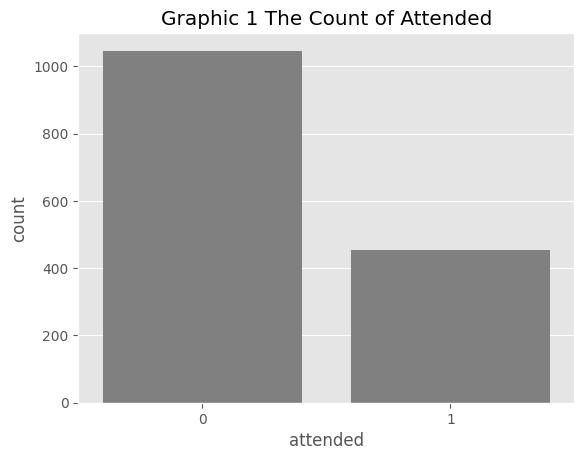

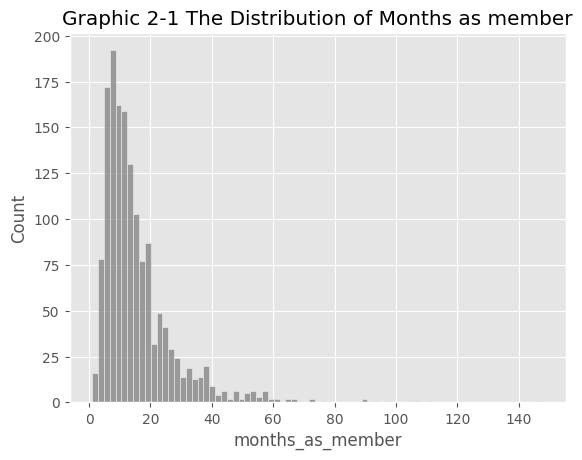

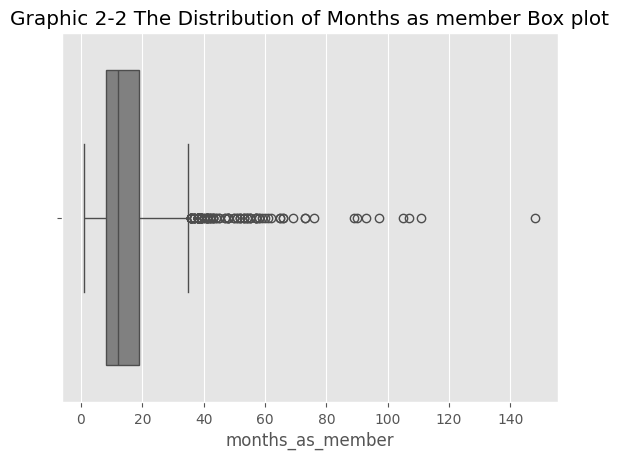

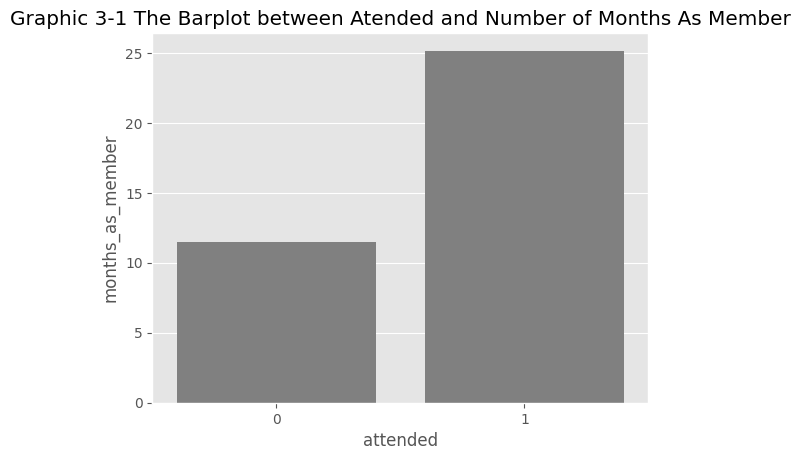

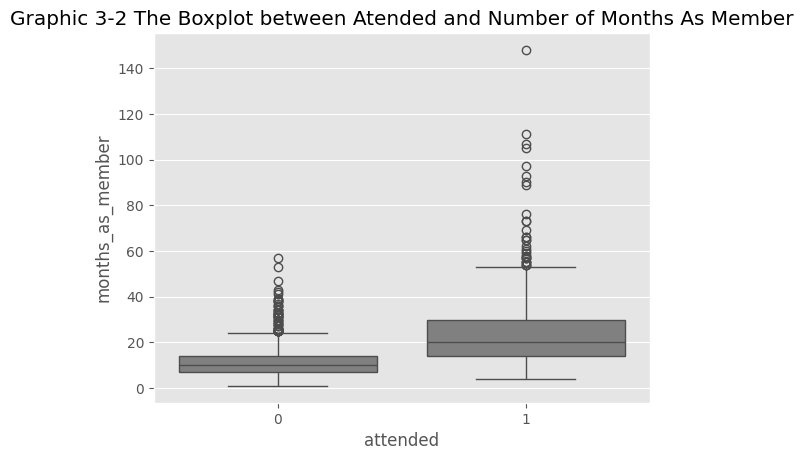

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: category, dtype: int64
[0 1]


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
df = pd.read_csv('fitness_class_2212.csv')
print(df.head(35))

# Replacing the null weight values with the mean
mean = df['weight'].mean()
df['weight'] = df['weight'].fillna(mean)

# Replacing the 'days' in the 'days_before' column with a white space
df['days_before'] = df['days_before'].str.replace(' days', '')

# Convert the data type of 'days_before' to int
df['days_before'] = df['days_before'].astype(int)

# Cleaning the 'days_of_week' column
df['day_of_week'] = df['day_of_week'].str.replace('Wednesday','Wed')
df['day_of_week'] = df['day_of_week'].str.replace('Monday','Mon')
df['day_of_week'] = df['day_of_week'].str.replace('Fri.','Fri')

# Cleanin the 'category' column by replacing '-' with white space
df['category'] = df['category'].replace('-', 'unknown')
print(df['category'].unique())
print(df['attended'].unique())

# Change the 'attended' column to an object type
df['attended'] = df['attended'].astype('object')
(df.info())

style.use('ggplot')
sns.countplot(x=df['attended'],color='gray').set(title='Graphic 1 The Count of Attended')
plt.show()
sns.histplot(x=df['months_as_member'],color='gray').set(title='Graphic 2-1 The Distribution of Months as member')
plt.show()

sns.boxplot(x=df['months_as_member'], color='gray').set(title='Graphic 2-2 The Distribution of Months as member Box plot')
plt.show()

sns.barplot(data=df, y='months_as_member', x='attended',color='gray', ci=None).set(title='Graphic 3-1 The Barplot between Atended and Number of Months As Member')
plt.show()
sns.boxplot(data=df, y='months_as_member', x='attended',color='gray').set(title='Graphic 3-2 The Boxplot between Atended and Number of Months As Member')
plt.show()
print(df['category'].value_counts())
df['attended'].astype('int')
print(df['attended'].unique())





## Data validation
The dataset contains 1500 rows and 8 columns
1. booking_id: Same as description and no missing values.
2. months_as_member: Same as description and no missing values.
3. weight: Same as description with a minimum of 55.41 and contains 20 missing values that should be replaced with the mean also known as the average weight.
4. days_before: No missing values here but convert it into integer data type and correct values that are appended with 'days' to single integer values and has a minimum of 1.
5. day_of_week: Same as description, no missing values replace full day names to match the description short day names.
6. time: Same as description and no missing values.
7. category: Same as description and '-' values should be replaced with 'unknown'.
8. attended: Should be changed to nominal data type and has no missing values.

## Comparison of the attended and didn't attend categories
We see from Graphic 1 that the number for bookings that did not attend is more than the number of those that attended.
The number of bookings in the not attended category is more than twice the number of those that attended.

![imagea1](image.png)




[Text(0.5, 1.0, 'Graphic 1 The Count of Attended'),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')]]

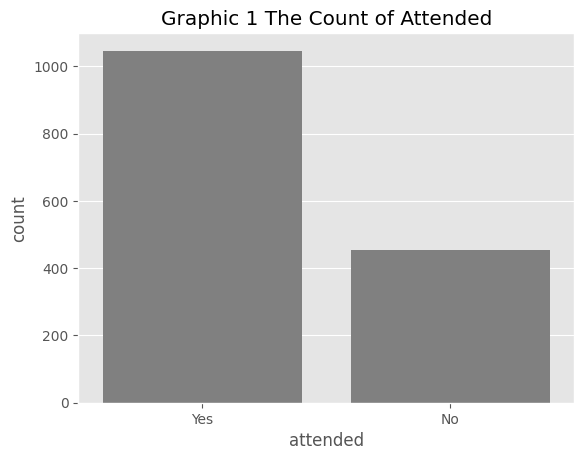

In [6]:
style.use('ggplot')
sns.countplot(x=df['attended'],color='gray').set(title='Graphic 1 The Count of Attended', xticklabels=['Yes', 'No'])

[Text(0.5, 1.0, 'Graphic 1 The Count of Attended'),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')]]

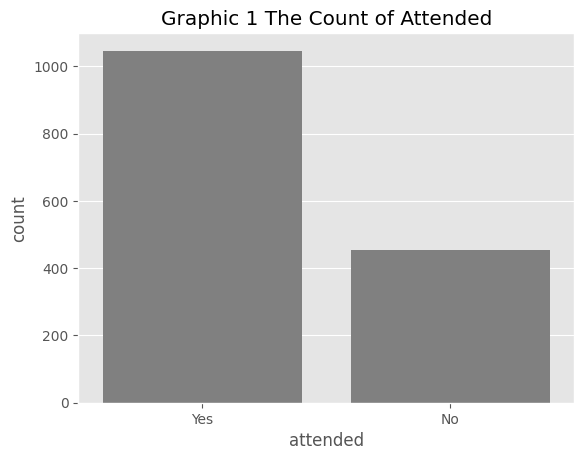

In [7]:
style.use('ggplot')
sns.countplot(x=df['attended'],color='gray').set(title='Graphic 1 The Count of Attended', xticklabels=['Yes', 'No'])



## The distribution of the months as a member variable
From **Graphic 2-1** we see the ditribution is close to a normal distribution however there appear to be outliers beyond 60 months and from **Graphic 2-2** there is a clearer view of an outlier with over 140 months as a member.

****

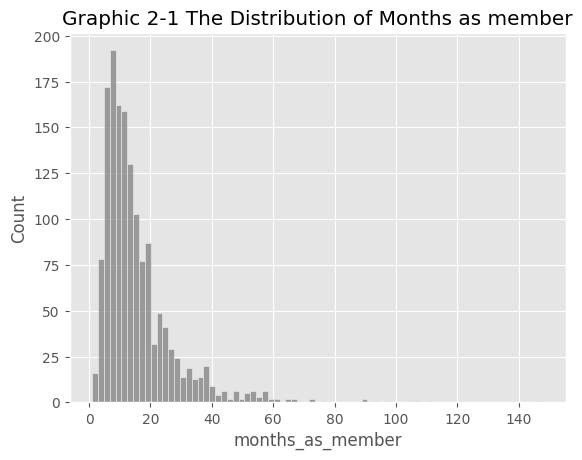

In [8]:
sns.histplot(x=df['months_as_member'],color='gray').set(title='Graphic 2-1 The Distribution of Months as member')
plt.show()



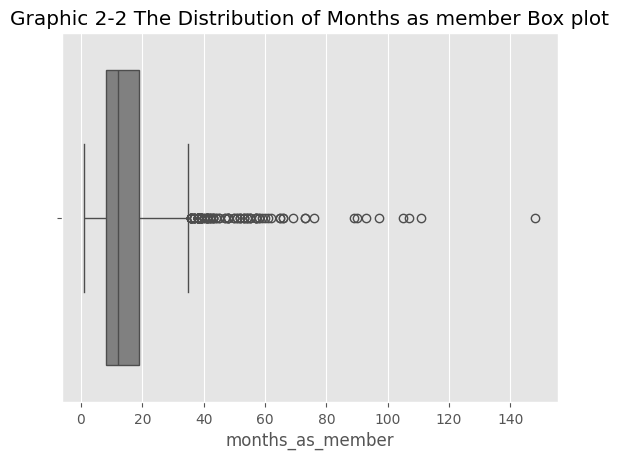

In [9]:
sns.boxplot(x=df['months_as_member'], color='gray').set(title='Graphic 2-2 The Distribution of Months as member Box plot')
plt.show()

## The relationship between months as memebers and if they attended a class or not
We see in **Graph 3-1** that members with more months as members attend more compared to those with less months as members.
We also see in **Graphic 3-2** that those that attended have a wider range of months as members with a median of about 20 months.


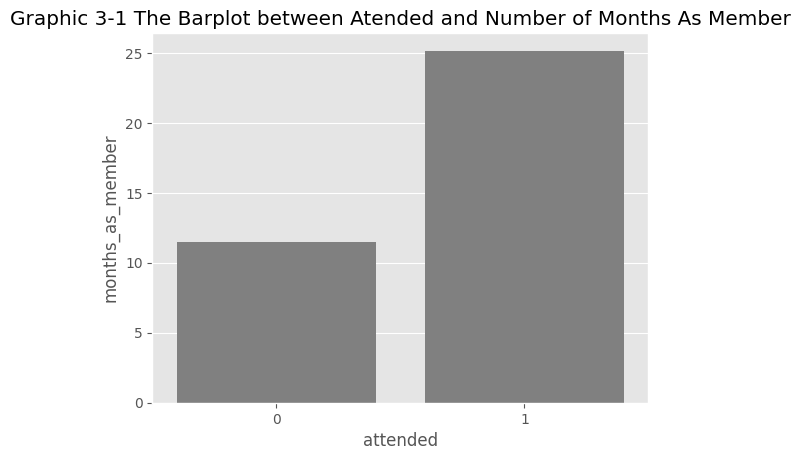

In [10]:
sns.barplot(data=df, y='months_as_member', x='attended',color='gray', ci=None).set(title='Graphic 3-1 The Barplot between Atended and Number of Months As Member')
plt.show()


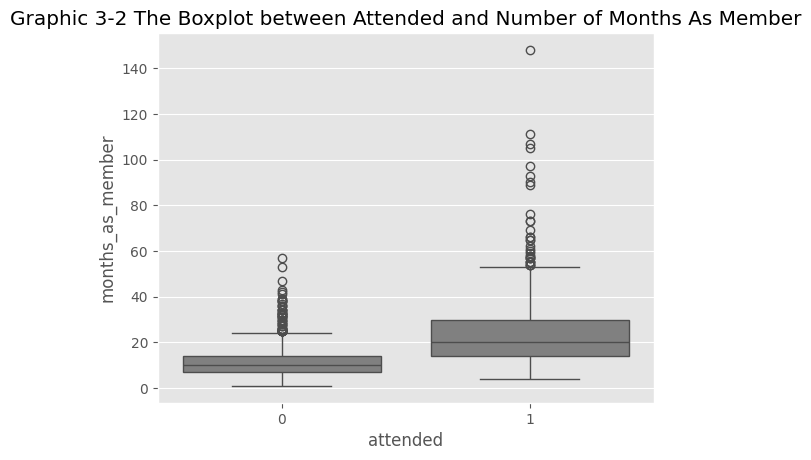

In [11]:
sns.boxplot(data=df, y='months_as_member', x='attended',color='gray').set(title='Graphic 3-2 The Boxplot between Attended and Number of Months As Member')
plt.show()

## Identifying the kind of machine learning problem
**Predicting whether members will attend is a classification problem in machine learning.**

## Baseline model - Logistic Regression model




In [12]:
from sklearn import utils
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df = df.drop(columns=['booking_id'], axis=1)
features = df.drop(columns='attended')
X = pd.get_dummies(features, drop_first=True).values
y = df['attended'].values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
LogReg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.3, random_state=123)
LogReg.fit(X_train, y_train)

LogisticRegression()

## Comparison model - Decision Tree Classifier model



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.3, stratify = y_transformed, random_state=1)
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

## Baseline and comparison model
I am using the **Logistic Regression model** because it is used for classification problems and is easy to interpret and implement. My comparison model is **Decision Tree Classifier model** because it's able to capture non linear relationships between features and labels and does not require scaling.

## Model accuracy test
I am using the accuracy_score method to evaluate the perfomance of the models since it is easy to use and interpret and since there are no class imbalances.

## Model accuracy Comparison

In [14]:

LogReg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.3, random_state=123)
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
print(accuracy_score(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.3, stratify = y_transformed, random_state=1)
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(accuracy_score(y_test, y_pred_dt))



0.7622222222222222
0.7466666666666667


## Model selection based on accuracy
A higher accuracy_score shows that the model performs better therefore the Logsitic Regression model performs better since it has a higher accuracy score than the Decission Tree Classifier model.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam